## Stock Price Prediction

In [13]:
#Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Importing dataset
data = pd.read_csv("/content/sample_data/prices-split-adjusted.csv")
df = pd.DataFrame(data)

In [15]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


### Data Information

In [16]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [17]:
# showing column wise %ge of NaN values they contains 

for i in df.columns:
  print(i,"\t-\t", df[i].isna().mean()*100)


date 	-	 0.0
symbol 	-	 0.0
open 	-	 0.0
close 	-	 0.0
low 	-	 0.0
high 	-	 0.0
volume 	-	 0.0


> Since there is no null valus, we can move further 

<ipython-input-18-09d32be31dc4>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormap = df.corr()


<Axes: >

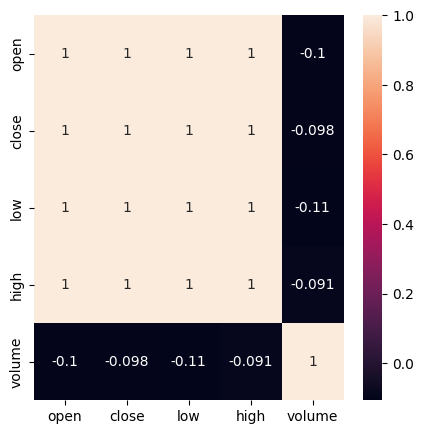

In [18]:
df = df[df['symbol']=='AAP']   # Choosin stock values for any company 

cormap = df.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cormap, annot = True)

In [19]:
def get_corelated_col(cor_dat, threshold): 
  # Cor_data to be column along which corelation to be measured 
  #Threshold be the value above which of corelation to considered
  feature=[]
  value=[]

  for i ,index in enumerate(cor_dat.index):
    if abs(cor_dat[index]) > threshold:
      feature.append(index)
      value.append(cor_dat[index])

  df = pd.DataFrame(data = value, index = feature, columns=['corr value'])
  return df


In [20]:
top_corelated_values = get_corelated_col(cormap['close'], 0.60)
top_corelated_values

,corr value
open,0.999382
close,1.000000
low,0.999615
high,0.999737


> Looks like all colums except _volume_ are ***highly co-related***. Using them for predictions.

In [21]:
df = df[top_corelated_values.index]
df.head()

,open,close,low,high
253,40.700001,40.380001,40.360001,41.040001
720,40.299999,40.139999,39.720001,40.310001
1188,40.049999,40.490002,40.049999,40.779999
1656,39.549999,40.480000,39.549999,40.540001
2124,40.250000,40.639999,40.110001,40.820000


In [22]:
df.shape

(1762, 4)

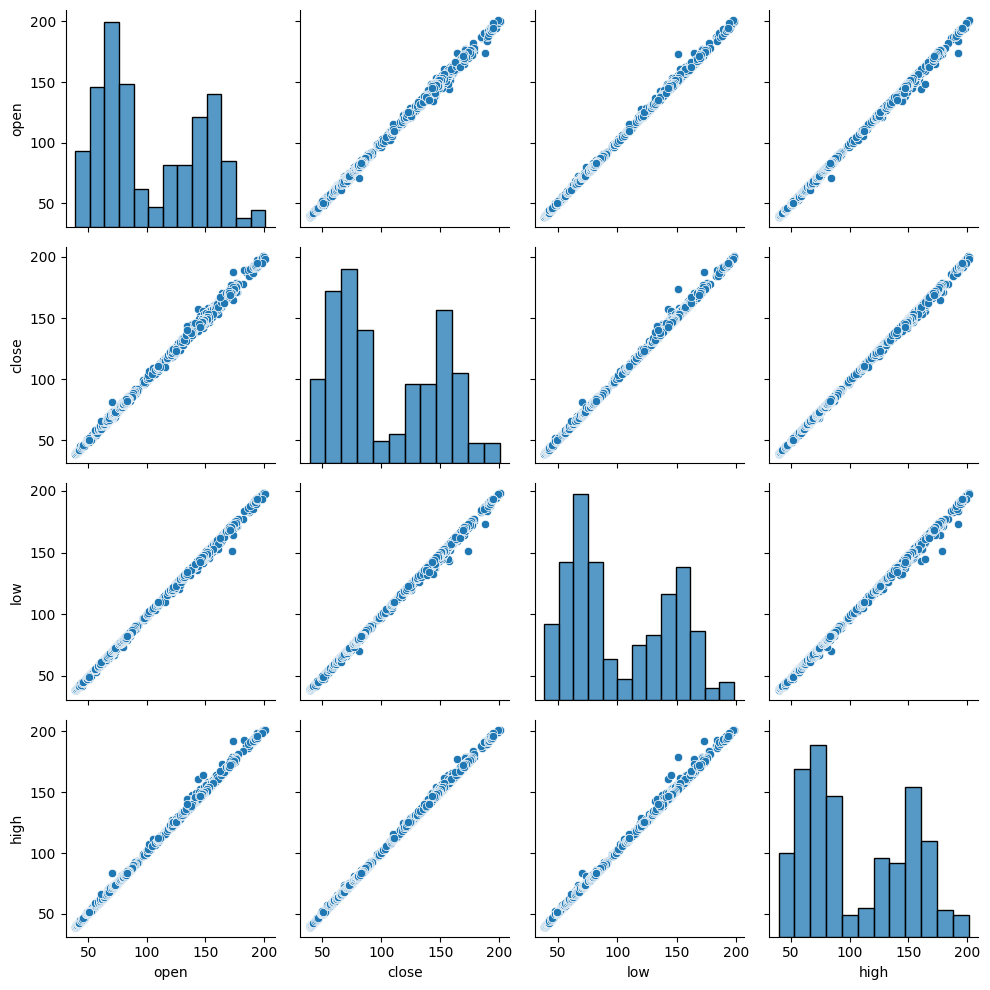

In [23]:
sns.pairplot(df)
plt.tight_layout()

> Since other parameters have linear relationship with __close__, we are using some linear models fore prediction

In [24]:
X = df.drop(['close'], axis=1)
y = df['close']

In [25]:
print("X.shape:",X.shape)

X.shape: (1762, 3)


In [26]:
X

,open,low,high
253,40.700001,40.360001,41.040001
720,40.299999,39.720001,40.310001
1188,40.049999,40.049999,40.779999
1656,39.549999,39.549999,40.540001
2124,40.250000,40.110001,40.820000
...,...,...,...
848766,170.690002,170.000000,172.080002
849266,170.720001,170.720001,172.750000
849766,172.009995,170.350006,172.929993
850266,170.080002,169.460007,171.080002


In [27]:
print("y.shape:",y.shape)

y.shape: (1762,)


In [28]:
y

253        40.380001
720        40.139999
1188       40.490002
1656       40.480000
2124       40.639999
             ...    
848766    170.889999
849266    171.839996
849766    170.419998
850266    170.279999
850766    169.119995
Name: close, Length: 1762, dtype: float64

> Since range of data in different columns veries significantly we need to scale the independent variable i.e. X. For this we will use Min-Max Scaling.

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,open,low,high
0,0.012001,0.012392,0.010256
1,0.009539,0.008387,0.005746
2,0.008000,0.010452,0.008649
3,0.004923,0.007323,0.007167
4,0.009231,0.010827,0.008897


## Prediction Model

In [30]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

In [31]:
print("X_train.shape:",X_train.shape )
print("X_test.shape:",X_test.shape )
print("y_train.shape:",y_train.shape )
print("y_test.shape:",y_test.shape )

X_train.shape: (1409, 3)
X_test.shape: (353, 3)
y_train.shape: (1409,)
y_test.shape: (353,)


In [75]:
X_train

array([[0.00756731, 0.00607864, 0.00824961, ..., 0.01589973, 0.01752089,
        0.01639856],
       [0.00607864, 0.00824961, 0.00818757, ..., 0.01752089, 0.01639856,
        0.01795736],
       [0.00824961, 0.00818757, 0.00918   , ..., 0.01639856, 0.01795736,
        0.00093529],
       ...,
       [0.74513081, 0.7659719 , 0.76262249, ..., 0.83395683, 0.83339568,
        0.82254641],
       [0.7659719 , 0.76262249, 0.77074801, ..., 0.83339568, 0.82254641,
        0.82304524],
       [0.76262249, 0.77074801, 0.77143031, ..., 0.82254641, 0.82304524,
        0.92149887]])

In [74]:
X_test

array([[0.77074801, 0.77143031, 0.74947278, ..., 0.82304524, 0.92149887,
        0.91676016],
       [0.77143031, 0.74947278, 0.76237442, ..., 0.92149887, 0.91676016,
        0.90216983],
       [0.74947278, 0.76237442, 0.77502789, ..., 0.91676016, 0.90216983,
        0.90890385],
       ...,
       [0.65661829, 0.6434685 , 0.7763925 , ..., 0.83246035, 0.81300658,
        0.81612417],
       [0.6434685 , 0.7763925 , 0.76801881, ..., 0.81300658, 0.81612417,
        0.82204759],
       [0.7763925 , 0.76801881, 0.78873591, ..., 0.81612417, 0.82204759,
        0.81319363]])

In [77]:
y_train

array([ 42.880001,  40.150002,  40.      , ..., 172.      , 187.789993,
       187.029999])

In [76]:
y_test

array([184.690002, 185.770004, 187.839996, 184.449997, 177.539993,
       173.75    , 171.220001, 171.460007, 176.229996, 176.479996,
       175.25    , 172.619995, 175.25    , 173.240005, 172.130005,
       175.320007, 174.919998, 174.880005, 174.839996, 175.      ,
       176.850006, 178.589996, 178.279999, 173.699997, 174.75    ,
       174.440002, 175.869995, 174.800003, 176.839996, 171.399994,
       170.529999, 189.529999, 192.039993, 191.690002, 191.169998,
       191.100006, 190.350006, 187.350006, 189.520004, 191.279999,
       190.850006, 187.070007, 190.550003, 190.800003, 191.399994,
       193.589996, 192.149994, 191.869995, 191.940002, 192.449997,
       193.270004, 194.279999, 197.479996, 198.429993, 200.380005,
       198.699997, 199.339996, 200.339996, 198.720001, 194.899994,
       194.110001, 194.669998, 164.639999, 161.619995, 164.220001,
       164.089996, 164.440002, 162.369995, 162.820007, 162.619995,
       163.190002, 164.300003, 164.839996, 162.729996, 162.339

### 1. Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

# model training

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [33]:
# prediction
y_pred_1 = model_1.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1})
pred_df.head()

,Actual,Predicted
675111,173.660004,173.682489
675608,171.919998,172.593759
676105,172.000000,171.182789
676602,187.789993,187.980305
677099,187.029999,188.440838


In [34]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.9931342019332019


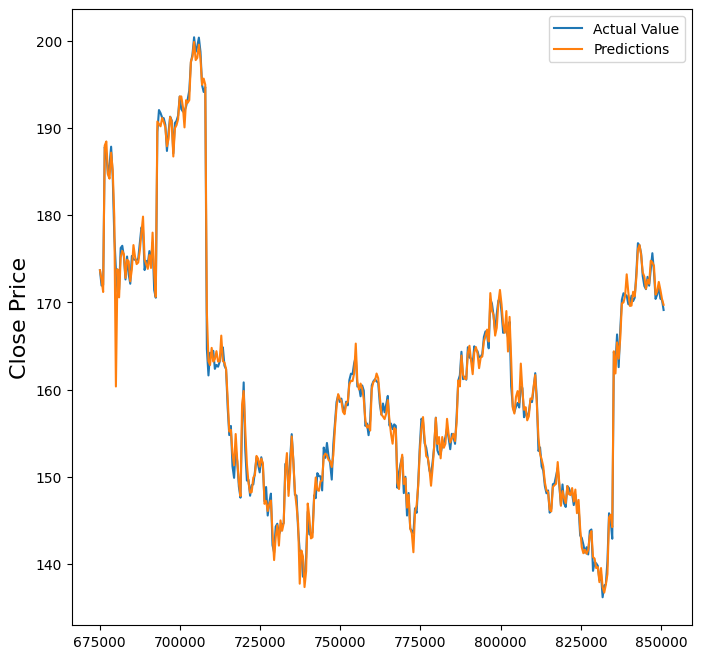

In [35]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

# 2. ANN

In [36]:
# Model Creation

from keras.models import Sequential
from keras.layers import Dense

def regressor(inp_dim):
    
    model = Sequential()
    
    model.add(Dense(20, input_dim=inp_dim, kernel_initializer='normal', activation='relu'))
    model.add(Dense(25, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [37]:
# Model Training

model_2 = regressor(inp_dim=3)
model_2.fit(X_train, y_train, epochs=70, validation_split=0.2)

Epoch 1/70
36/36 [==============================] - 1s 6ms/step - loss: 6058.0098 - val_loss: 22084.5156
Epoch 2/70
36/36 [==============================] - 0s 2ms/step - loss: 6041.6006 - val_loss: 21992.0801
Epoch 3/70
36/36 [==============================] - 0s 2ms/step - loss: 5967.2217 - val_loss: 21545.8359
Epoch 4/70
36/36 [==============================] - 0s 2ms/step - loss: 5699.7646 - val_loss: 20101.1973
Epoch 5/70
36/36 [==============================] - 0s 3ms/step - loss: 5003.8447 - val_loss: 16771.3008
Epoch 6/70
36/36 [==============================] - 0s 2ms/step - loss: 3680.7659 - val_loss: 11184.1748
Epoch 7/70
36/36 [==============================] - 0s 2ms/step - loss: 1906.5698 - val_loss: 4887.9590
Epoch 8/70
36/36 [==============================] - 0s 2ms/step - loss: 509.7447 - val_loss: 1119.3259
Epoch 9/70
36/36 [==============================] - 0s 2ms/step - loss: 53.1583 - val_loss: 261.3687
Epoch 10/70
36/36 [==============================] - 0s 3ms/st

In [38]:
# Prediction

y_pred_2 = model_2.predict(X_test)

12/12 [==============================] - 0s 1ms/step


In [39]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2.flatten()})
pred_df.head()

,Actual,Predicted
675111,173.660004,174.367325
675608,171.919998,172.668304
676105,172.000000,170.882660
676602,187.789993,179.660156
677099,187.029999,188.437439


In [40]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.9877768883302461


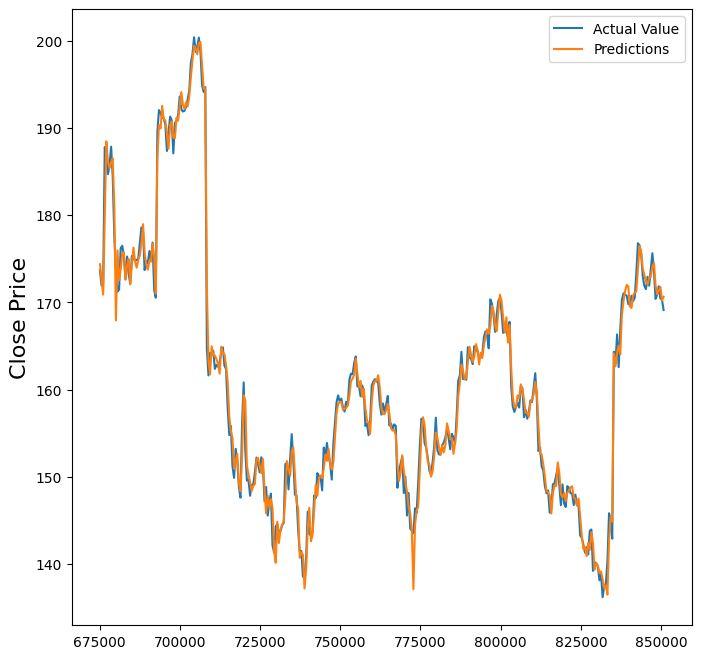

In [41]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

# 3. CNN

In [42]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

In [43]:
from tensorflow.keras import Sequential,utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout

def reg():
    
    model = Sequential()
    
    model.add(Conv1D(32, kernel_size=(3,), padding='same', activation='relu', input_shape = (X_train.shape[1],1)))
    model.add(Conv1D(64, kernel_size=(3,), padding='same', activation='relu'))
    model.add(Conv1D(128, kernel_size=(5,), padding='same', activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(50, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(units = 1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [44]:
# Model Training

model_3 = reg()
model_3.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
36/36 [==============================] - 1s 8ms/step - loss: 5427.3291 - val_loss: 9189.2041
Epoch 2/100
36/36 [==============================] - 0s 6ms/step - loss: 379.3865 - val_loss: 1.5872
Epoch 3/100
36/36 [==============================] - 0s 5ms/step - loss: 9.3128 - val_loss: 1.7305
Epoch 4/100
36/36 [==============================] - 0s 4ms/step - loss: 0.8452 - val_loss: 2.3394
Epoch 5/100
36/36 [==============================] - 0s 4ms/step - loss: 0.5090 - val_loss: 1.4183
Epoch 6/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4291 - val_loss: 1.4049
Epoch 7/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4097 - val_loss: 1.4112
Epoch 8/100
36/36 [==============================] - 0s 4ms/step - loss: 0.4142 - val_loss: 2.0600
Epoch 9/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4150 - val_loss: 1.5790
Epoch 10/100
36/36 [==============================] - 0s 5ms/step - loss: 0.4002 - val_loss: 1.4465
E

In [45]:
# Prediction

y_pred_3 = model_3.predict(X_test)

12/12 [==============================] - 0s 2ms/step


In [46]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
675111,173.660004,174.578140
675608,171.919998,172.985275
676105,172.000000,171.222427
676602,187.789993,181.586227
677099,187.029999,188.990341


In [47]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.9897600795420618


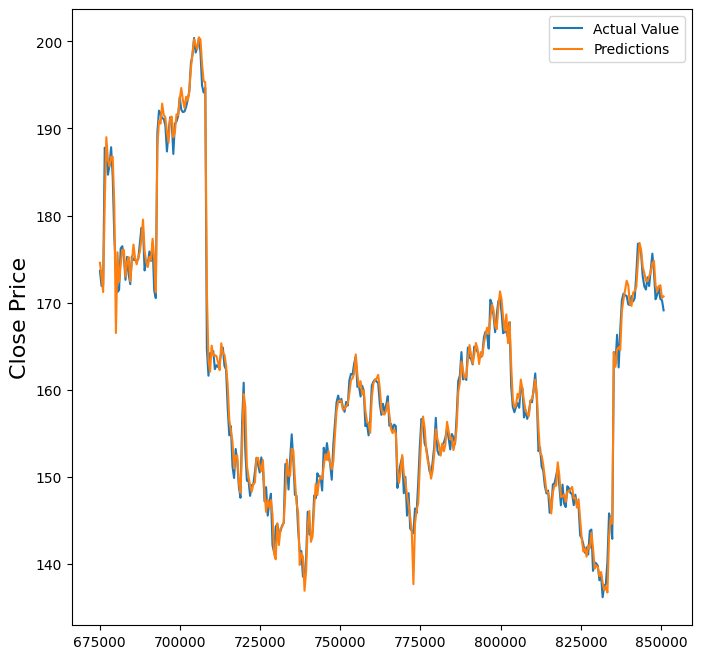

In [48]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

> Comparision of Accuracies of different models

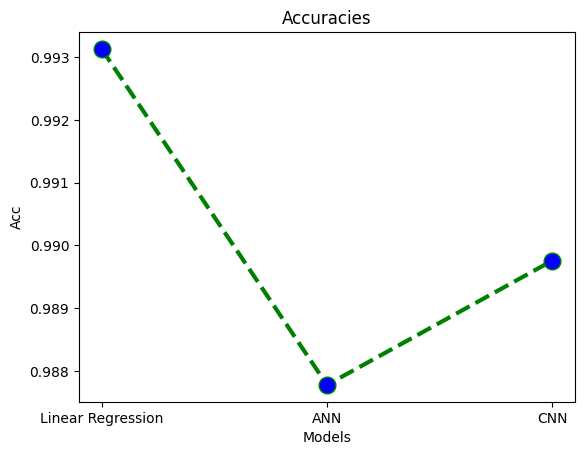

In [49]:
plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['Linear Regression', 'ANN', 'CNN'])
plt.show()

**********************

### Now converting data in a time series data and applying some more models.

In [50]:
close = df.reset_index()['close']
close.head()

0    40.380001
1    40.139999
2    40.490002
3    40.480000
4    40.639999
Name: close, dtype: float64

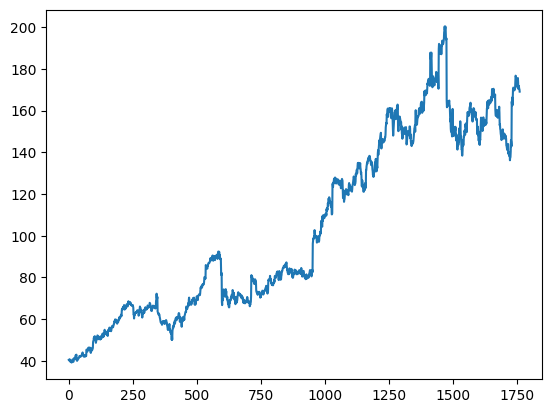

In [51]:
plt.plot(close)
plt.show()

In [52]:
time_step = 30
X, y = [], []

for i in range(len(close)-time_step-1):
    X.append(close[i:(i+time_step)])
    y.append(close[(i+time_step)])

X = np.array(X)
y = np.array(y)

In [53]:
X[:5]

array([[40.380001, 40.139999, 40.490002, 40.48    , 40.639999, 40.240002,
        39.540001, 40.09    , 39.560001, 39.310001, 39.5     , 39.16    ,
        39.23    , 39.740002, 40.5     , 40.549999, 40.59    , 39.77    ,
        39.450001, 40.490002, 41.189999, 41.189999, 40.93    , 40.720001,
        40.810001, 41.57    , 42.330002, 42.549999, 42.810001, 42.630001],
       [40.139999, 40.490002, 40.48    , 40.639999, 40.240002, 39.540001,
        40.09    , 39.560001, 39.310001, 39.5     , 39.16    , 39.23    ,
        39.740002, 40.5     , 40.549999, 40.59    , 39.77    , 39.450001,
        40.490002, 41.189999, 41.189999, 40.93    , 40.720001, 40.810001,
        41.57    , 42.330002, 42.549999, 42.810001, 42.630001, 42.880001],
       [40.490002, 40.48    , 40.639999, 40.240002, 39.540001, 40.09    ,
        39.560001, 39.310001, 39.5     , 39.16    , 39.23    , 39.740002,
        40.5     , 40.549999, 40.59    , 39.77    , 39.450001, 40.490002,
        41.189999, 41.189999, 40.93 

In [54]:
y[:5]

array([42.880001, 40.150002, 40.      , 40.240002, 40.220001])

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.007567,0.006079,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,...,0.007420,0.007420,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399
1,0.006079,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,...,0.007420,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957
2,0.008250,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,...,0.005799,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935
3,0.008188,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,0.000434,...,0.004489,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935,0.000000
4,0.009180,0.006699,0.002357,0.005769,0.002481,0.000930,0.002109,0.000000,0.000434,0.003598,...,0.005051,0.009789,0.014528,0.015900,0.017521,0.016399,0.017957,0.000935,0.000000,0.001496


## Prediction

In [56]:
#now lets split data in test train pairs

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

Acc = []

# 1. LSTM

In [57]:
X_train_ = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_ = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [58]:
from tensorflow.keras.layers import LSTM

def Reg():
    model = Sequential()
    
    model.add(LSTM(70, return_sequences=True, input_shape=(30,1)))
    model.add(LSTM(70, return_sequences=True))
    model.add(LSTM(70))
    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    return model

In [59]:
# Model Training

model_1 = reg()
model_1.fit(X_train_, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
35/35 [==============================] - 2s 16ms/step - loss: 2839.1304 - val_loss: 502.9487
Epoch 2/100
35/35 [==============================] - 0s 12ms/step - loss: 82.8143 - val_loss: 138.9813
Epoch 3/100
35/35 [==============================] - 0s 13ms/step - loss: 17.8786 - val_loss: 56.4816
Epoch 4/100
35/35 [==============================] - 0s 12ms/step - loss: 15.4909 - val_loss: 39.6938
Epoch 5/100
35/35 [==============================] - 0s 12ms/step - loss: 15.2368 - val_loss: 44.1581
Epoch 6/100
35/35 [==============================] - 0s 12ms/step - loss: 14.6723 - val_loss: 49.8845
Epoch 7/100
35/35 [==============================] - 0s 14ms/step - loss: 14.8204 - val_loss: 37.7865
Epoch 8/100
35/35 [==============================] - 0s 13ms/step - loss: 15.6840 - val_loss: 66.3875
Epoch 9/100
35/35 [==============================] - 0s 12ms/step - loss: 14.7322 - val_loss: 29.7647
Epoch 10/100
35/35 [==============================] - 0s 12ms/step - loss: 13.

In [60]:
# Prediction

y_pred_1 = model_1.predict(X_test_)

11/11 [==============================] - 0s 4ms/step


In [61]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.flatten()})
pred_df.head()

,Actual,Predicted
0,184.690002,190.286423
1,185.770004,191.675278
2,187.839996,192.641052
3,184.449997,193.666977
4,177.539993,193.068497


In [62]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_1)))
Acc.append(r2_score(y_test, y_pred_1))

Accuracy score of the predictions: 0.7933446090519917


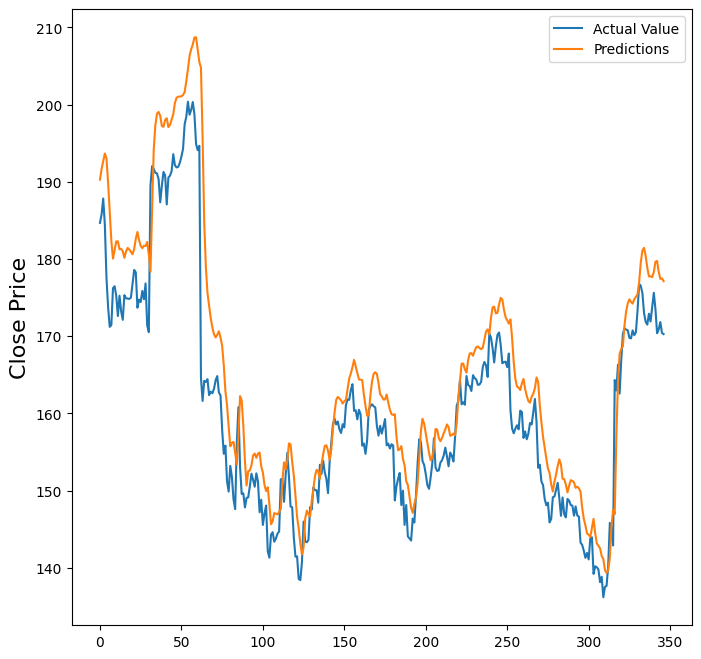

In [63]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

### 2. ANN

In [64]:
# Model Training

model_2 = regressor(inp_dim=30)
model_2.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
35/35 [==============================] - 1s 5ms/step - loss: 6282.6372 - val_loss: 22386.9883
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 6225.7749 - val_loss: 21716.4648
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 5774.1948 - val_loss: 17448.4434
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 4006.9087 - val_loss: 5881.5488
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 1139.5695 - val_loss: 579.7264
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 232.0544 - val_loss: 1638.7595
Epoch 7/100
35/35 [==============================] - 0s 2ms/step - loss: 210.7227 - val_loss: 1368.3524
Epoch 8/100
35/35 [==============================] - 0s 3ms/step - loss: 199.9509 - val_loss: 1330.6510
Epoch 9/100
35/35 [==============================] - 0s 2ms/step - loss: 189.3624 - val_loss: 1207.0785
Epoch 10/100
35/35 [==============================] - 0s 

In [65]:
# Prediction

y_pred_2 = model_2.predict(X_test)

11/11 [==============================] - 0s 1ms/step


In [66]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_2)))
Acc.append(r2_score(y_test, y_pred_2))

Accuracy score of the predictions: 0.8328921463010749


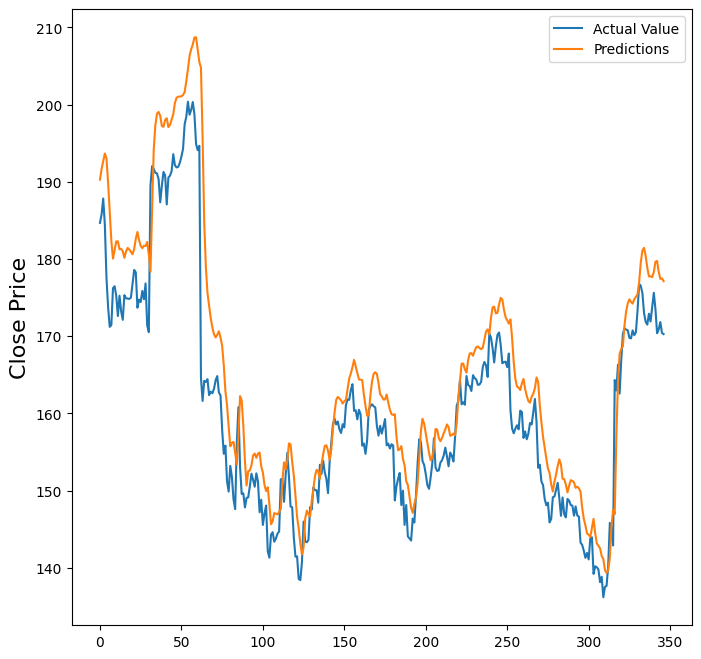

In [67]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

# 3. CNN

In [68]:
# Model Training

model_3 = reg()
model_3.fit(X_train_, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
35/35 [==============================] - 1s 16ms/step - loss: 3442.7651 - val_loss: 68.7464
Epoch 2/100
35/35 [==============================] - 0s 12ms/step - loss: 88.6496 - val_loss: 91.5802
Epoch 3/100
35/35 [==============================] - 0s 12ms/step - loss: 17.8116 - val_loss: 34.4451
Epoch 4/100
35/35 [==============================] - 0s 13ms/step - loss: 15.0764 - val_loss: 36.7832
Epoch 5/100
35/35 [==============================] - 0s 12ms/step - loss: 14.8965 - val_loss: 37.1780
Epoch 6/100
35/35 [==============================] - 0s 12ms/step - loss: 14.9272 - val_loss: 33.8279
Epoch 7/100
35/35 [==============================] - 0s 12ms/step - loss: 14.5003 - val_loss: 39.2633
Epoch 8/100
35/35 [==============================] - 0s 11ms/step - loss: 14.7617 - val_loss: 39.0977
Epoch 9/100
35/35 [==============================] - 0s 12ms/step - loss: 14.1248 - val_loss: 29.0442
Epoch 10/100
35/35 [==============================] - 0s 12ms/step - loss: 14.07

In [69]:
# Prediction

y_pred_3 = model_3.predict(X_test_)

11/11 [==============================] - 0s 3ms/step


In [70]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3.flatten()})
pred_df.head()

,Actual,Predicted
0,184.690002,189.733734
1,185.770004,189.900711
2,187.839996,190.955841
3,184.449997,192.440277
4,177.539993,191.291199


In [71]:
# Measure the Accuracy Score

from sklearn.metrics import r2_score
 
print("Accuracy score of the predictions: {0}".format(r2_score(y_test, y_pred_3)))
Acc.append(r2_score(y_test, y_pred_3))

Accuracy score of the predictions: 0.8326076119779898


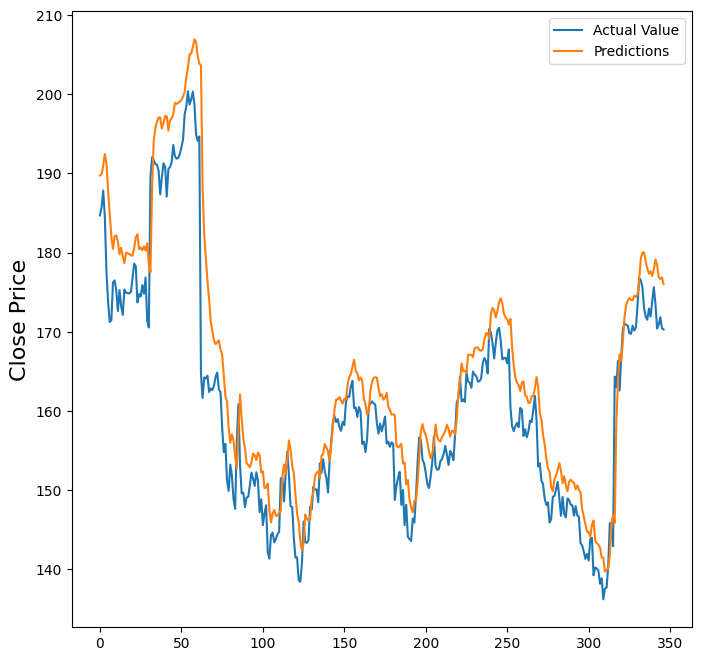

In [72]:
plt.figure(figsize=(8,8))
plt.ylabel('Close Price', fontsize=16)
plt.plot(pred_df)
plt.legend(['Actual Value', 'Predictions'])
plt.show()

> Comparision of Accuracies of different models

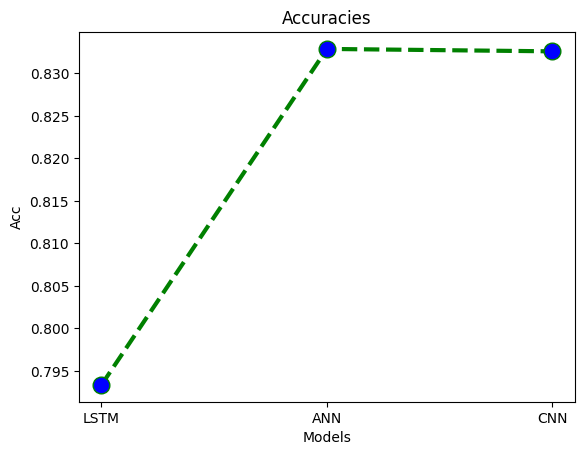

In [73]:

plt.plot(range(3), Acc, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12) 
plt.ylabel('Acc')
plt.xlabel('Models')
plt.title("Accuracies")
plt.xticks(range(3), ['LSTM', 'ANN', 'CNN'])
plt.show()